In [1]:
import pandas as pd
import gtfs_kit as gk
import geopandas as gpd
import pyproj as pj
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium import plugins

### Function Definition

In [2]:
# Function to visualize on map the route
def route_and_stop_visualization():
    ### We create a map with a view on the zone we are interested in
    map = folium.Map(location=[43.9941, 10.2301], tiles="OpenStreetMap", zoom_start=9)
    
    ### We Circle The Stops belonging to the route
    for point in stops.geometry:
        folium.CircleMarker((point.xy[1][0],point.xy[0][0]), color="blue", weight=0.5, opacity=1).add_to(map)
    
    ### The lists of shapes have duplicates because each shape describe the trip for both direction
    ### so for drawing purposes we want to select only one of the way. Then we draw the shapes
    shape_id_list_duplicates = shapes["shape_id"].to_list()
    shape_id_list = list(set(shape_id_list_duplicates))
    
    for shape_id in shape_id_list:
        shape_df_list = []
        shape_to_draw = shapes.loc[(shapes['shape_id'] == shape_id)]
        shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
        for point in shape_to_draw.geometry:
            shape_df_list.append((point.xy[1][0],point.xy[0][0]))
        folium.PolyLine(shape_df_list, color="red", weight=1.5, opacity=1).add_to(map)
    
    return map

### Initial Exploration

In [3]:
# Load the gtfs we generated with the various csv file created in the preprocessing
feed = gk.feed.read_feed('../preprocessing.zip',dist_units="km")
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

In [4]:
### Checking dimensions
routes_dimension = routes.shape
print(f" Routes Dimension: {routes.shape}")
trips_dimension = trips.shape
print(f" Trips Dimension: {trips.shape}")
stops_dimension = stops.shape
print(f" Stops Dimension: {stops.shape}")
stop_times_dimension = stop_times.shape
print(f" Stop Times Dimension: {stop_times.shape}")
shapes_dimension = shapes.shape
print(f" Shapes Dimension: {shapes.shape}")
calendar_dates_dimension = calendar_dates.shape
print(f" Calenda Dates Dimension: {calendar_dates.shape}")
calendar_dimension = calendar.shape
print(f" Calend Dimension: {calendar.shape}")

 Routes Dimension: (3, 7)
 Trips Dimension: (1201, 7)
 Stops Dimension: (36, 5)
 Stop Times Dimension: (12497, 6)
 Shapes Dimension: (104363, 5)
 Calenda Dates Dimension: (28260, 2)
 Calend Dimension: (201, 10)


In [5]:
### Look at the head of each table
print("Route Head of Dataframe")
print(routes.head())
print('-' * 50)
print("Trips Head of Dataframe")
print(trips.head())
print('-' * 50)
print("Stops Head of Dataframe")
print(stops.head())
print('-' * 50)
print("Stop Times Head of Dataframe")
print(stop_times.head())
print('-' * 50)
print("Shape Head of Dataframe")
print(shapes.head())
print('-' * 50)
print("Calendar Dates Head of Dataframe")
print(calendar_dates.head())
print('-' * 50)
print("Calendar Head of Dataframe")
print(calendar.head())

Route Head of Dataframe
     route_id agency_id route_short_name       route_long_name  route_type  \
0  1085727347       163              NaN  Pisa - Lucca - Aulla           2   
1  1199544473       163              NaN  Pisa - Lucca - Aulla           2   
2  1011259294       163              NaN  Pisa - Lucca - Aulla           2   

  route_color route_text_color  
0      FFFFFF           000000  
1      FFFFFF           000000  
2      FFFFFF           000000  
--------------------------------------------------
Trips Head of Dataframe
     route_id   service_id      trip_id trip_headsign trip_short_name  \
0  1085727347  1814_171965  1814_191301     Pisa C.Le           06772   
1  1085727347  1814_171965  1814_191302     Pisa C.Le           06732   
2  1085727347  1814_171965  1814_191303         Lucca           06745   
3  1085727347  1814_171965  1814_191304     Pisa C.Le           06794   
4  1085727347  1814_171965  1814_191305         Lucca           06733   

   direction_id  

In [6]:
### Our dataframe contains geographical coordinates and we convert them 
### in GeoDataFrame for better visualization
shapes = gpd.GeoDataFrame(shapes, 
        geometry=gpd.points_from_xy(shapes.shape_pt_lon, shapes.shape_pt_lat)).set_crs(epsg=4326)

stops = gpd.GeoDataFrame(stops, 
        geometry=gpd.points_from_xy(stops.stop_lon, stops.stop_lat)).set_crs(epsg=4326)

<Axes: xlabel='shape_pt_lon', ylabel='shape_pt_lat'>

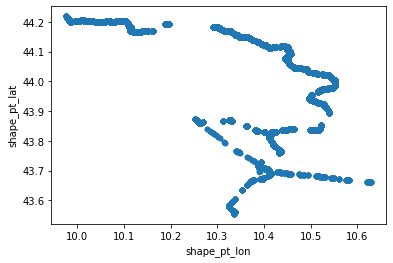

In [7]:
### We plot the shape which will result as the route
rt_df = pd.merge(routes, trips, on=['route_id','route_id']).reset_index(drop=True)
rts_df = pd.merge(rt_df, shapes, on=['shape_id','shape_id']).reset_index(drop=True)
rts_df.plot.scatter(x="shape_pt_lon",y="shape_pt_lat")

In [8]:
### We visualize the route to understand if there are impurities
route_and_stop_visualization()

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

## Data cleaning

In [9]:
stops

,stop_id,stop_name,stop_lat,stop_lon,stop_code,geometry
0,S06404_1,Lucca,43.837397,10.506153,S06404,POINT (10.50615 43.83740)
1,S06402_1,Ripafratta,43.821737,10.415844,S06402,POINT (10.41584 43.82174)
2,S06400_1,S.Giuliano Terme,43.764855,10.436916,S06400,POINT (10.43692 43.76485)
3,S06501_1,Pisa S.Rossore,43.723446,10.387754,S06501,POINT (10.38775 43.72345)
4,S06500_1,Pisa C.Le,43.708231,10.398389,S06500,POINT (10.39839 43.70823)
5,S06401_1,Rigoli,43.789761,10.419810,S06401,POINT (10.41981 43.78976)
6,S06502_1,Navacchio,43.686018,10.487235,S06502,POINT (10.48724 43.68602)
7,S06504_1,S.Frediano A S.,43.680915,10.516213,S06504,POINT (10.51621 43.68091)
8,S06505_1,Cascina,43.674657,10.545433,S06505,POINT (10.54543 43.67466)
9,S06506_1,Pontedera C.T.,43.662342,10.628906,S06506,POINT (10.62891 43.66234)


In [10]:
# Delete the stops
stops_id_to_delete = ["S06725_1","S06506_1","S06505_1","S06504_1","S06502_1","S06351_1","S06350_1","S06040_1"]
for stops_to_delete in stops_id_to_delete:
    stops = stops[stops.stop_id != stops_to_delete]

In [11]:
# Based on the stops we calculate the list of stop_times to delete. We also take the list of
# trip ids to delete

trip_ids_to_delete = []
indexes_stops_to_delete = []
for ind in stop_times.index:
    for stops_to_delete in stops_id_to_delete:
        if stop_times["stop_id"][ind] == stops_to_delete:
            trip_ids_to_delete.append(stop_times["trip_id"][ind])
            indexes_stops_to_delete.append(ind)

### For safety reasons we delete rows from the dataframe after the complete for sequence
for ind_to_delete in indexes_stops_to_delete:
    stop_times = stop_times[stop_times.index != ind_to_delete]

In [12]:
# Based on the trips_ids we calculate the list of shapes and trips to delete. 

shape_ids_to_delete = []

for ind in trips.index:
    for trip_to_delete in trip_ids_to_delete:
        if trips["trip_id"][ind] == trip_to_delete:
            shape_ids_to_delete.append(trips["shape_id"][ind])

### For safety reasons we delete rows from the dataframe after the complete for sequence
for trip_to_delete in trip_ids_to_delete:
    trips = trips[trips.trip_id != trip_to_delete]
    
## We do deletion for shapes too
for shape_to_delete in shape_ids_to_delete:
    shapes = shapes[shapes.shape_id != shape_to_delete]

In [13]:
### We visualize the route after the cleaning
route_and_stop_visualization()

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_to_draw.drop_duplicates(subset='shape_pt_sequence', keep="first",inplace=True)
/var/folders/zt/4qm_9p2d267_7b0p2r1hsg840000gn/T/ipykernel_7357/2435985989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [14]:
# Subtraction of dimensions
subtracted_dimensions = pd.DataFrame(columns=["Name","Initial","Updated","Difference"])

res = tuple(map(lambda i, j: i - j, stops_dimension, stops.shape))
subtracted_dimensions.loc[0] = ["Stops",stops_dimension, stops.shape, res]

res = tuple(map(lambda i, j: i - j, trips_dimension, trips.shape))
subtracted_dimensions.loc[1] = ["Trips",trips_dimension, trips.shape, res]

res = tuple(map(lambda i, j: i - j, stop_times_dimension,stop_times.shape))
subtracted_dimensions.loc[2] = ["Stop_Times",stop_times_dimension, stop_times.shape, res]

res = tuple(map(lambda i, j: i - j, shapes_dimension, shapes.shape))
subtracted_dimensions.loc[3] = ["Shapes",shapes_dimension, shapes.shape, res]

subtracted_dimensions

,Name,Initial,Updated,Difference
0,Stops,"(36, 5)","(28, 6)","(8, -1)"
1,Trips,"(1201, 7)","(1149, 7)","(52, 0)"
2,Stop_Times,"(12497, 6)","(12393, 6)","(104, 0)"
3,Shapes,"(104363, 5)","(96692, 6)","(7671, -1)"


In [15]:
# Join the dataset for easy at use
df_analytics = trips
df_analytics = pd.merge(df_analytics, routes, on=['route_id','route_id'])
df_analytics = pd.merge(df_analytics, stop_times, on=['trip_id','trip_id'])
df_analytics = pd.merge(df_analytics, stops, on=['stop_id','stop_id'])


In [16]:
# Basic statistics on the number of stops
print("Mean of stop_sequence : " + str(df_analytics.stop_sequence.mean()))
print('-' * 50)
print("Median of stop_sequence : " + str(df_analytics.stop_sequence.median()))
print('-' * 50)
print("Standard Deviation of stop_sequence : " + str(df_analytics.stop_sequence.std()))
print('-' * 50)
print("Skewness of stop_sequence : " + str(df_analytics.stop_sequence.skew()))

Mean of stop_sequence : 8.214128595600677
--------------------------------------------------
Median of stop_sequence : 6.0
--------------------------------------------------
Standard Deviation of stop_sequence : 6.3794942916546935
--------------------------------------------------
Skewness of stop_sequence : 0.8484014908177951


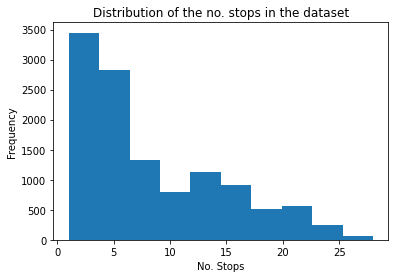

In [17]:
# Distribution of number of stops in the dataset
plt.title('Distribution of the no. stops in the dataset')
plt.hist(df_analytics.stop_sequence)
plt.xlabel('No. Stops')
plt.ylabel('Frequency')
plt.show()

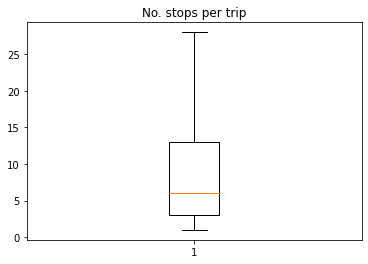

In [18]:
# Number of stops per trip
plt.boxplot(df_analytics.stop_sequence)

plt.title('No. stops per trip')
plt.show()

## Saving general data processed

In [25]:
result = gk.feed.read_feed('../preprocessing.zip',dist_units="km")

In [26]:
result.routes = routes
result.stop_times = stop_times
result.trips = trips
result.stops = stops
result.shapes = shapes
result.calendar_dates = calendar_dates
result.calendar = calendar


In [29]:
result.write('../general_data_analytics.zip',9)